**Import Packages**

In [3]:
import pycaret
import pandas as pd
import numpy as np
import sqlalchemy
import mysql.connector

from pycaret import classification
from pycaret.classification import plot_model
from datetime import datetime
import importlib
import model.common

In [4]:
from static_data.load_static_data import *

In [5]:
df_player_team_positions

,Unnamed: 0,player_id,player_name,player_team_id,player_team_name,player_position
0,0,456167,A.J. Griffin,133,Oakland Athletics,Pitcher
1,0,134460,A.J. Hinch,133,Oakland Athletics,Catcher
2,0,640462,A.J. Puk,133,Oakland Athletics,Pitcher
3,0,605156,Aaron Brooks,133,Oakland Athletics,Pitcher
4,0,488811,Aaron Cunningham,133,Oakland Athletics,Outfielder
...,...,...,...,...,...,...
44728,0,451596,Yovani Gallardo,113,Cincinnati Reds,Pitcher
44729,0,435043,Zach Duke,113,Cincinnati Reds,Pitcher
44730,0,572227,Zach Vincej,113,Cincinnati Reds,Infielder
44731,0,446359,Zack Cozart,113,Cincinnati Reds,Infielder


**Load Data**

In [6]:
collect_data_Base_dir = 'collect_data'

In [7]:
df_game_matchup_total = pd.read_pickle(f'{collect_data_Base_dir}/df_game_matchup_total.pkl')
print(len(df_game_matchup_total))

322963


**Clean Data**

In [8]:
importlib.reload(model.common)

<module 'model.common' from '/home/junlim/projects/mlb-props/model/common.py'>

In [9]:
model.common.categorical_features

['game_venue', 'batting_name', 'pitching_name']

In [10]:
train_data = df_game_matchup_total[(df_game_matchup_total.game_date > "2012-04-01") & (df_game_matchup_total.game_date < "2022-12-01")][model.common.features]
test_data = df_game_matchup_total[(df_game_matchup_total.game_date > "2022-12-01")][model.common.features]

In [11]:
train_data.columns

Index(['pitching_gamesPlayed', 'pitching_runs_per_game',
       'pitching_strikeOuts_per_game', 'pitching_hits_per_game', 'pitching_id',
       'batting_name', 'batting_gamesPlayed', 'batting_runs_per_game',
       'batting_strikeOuts_per_game', 'batting_hits_per_game', 'batting_rbi',
       'batting_id', 'pitching_name', 'batting_hit_recorded',
       'pitching_cur_season_runs_per_game',
       'pitching_cur_season_strikeOuts_per_game',
       'pitching_cur_season_hits_per_game', 'batting_cur_season_runs_per_game',
       'batting_cur_season_strikeOuts_per_game',
       'batting_cur_season_hits_per_game', 'temp', 'game_venue', 'game_date',
       'game_year'],
      dtype='object')

In [12]:
test_data.columns

Index(['pitching_gamesPlayed', 'pitching_runs_per_game',
       'pitching_strikeOuts_per_game', 'pitching_hits_per_game', 'pitching_id',
       'batting_name', 'batting_gamesPlayed', 'batting_runs_per_game',
       'batting_strikeOuts_per_game', 'batting_hits_per_game', 'batting_rbi',
       'batting_id', 'pitching_name', 'batting_hit_recorded',
       'pitching_cur_season_runs_per_game',
       'pitching_cur_season_strikeOuts_per_game',
       'pitching_cur_season_hits_per_game', 'batting_cur_season_runs_per_game',
       'batting_cur_season_strikeOuts_per_game',
       'batting_cur_season_hits_per_game', 'temp', 'game_venue', 'game_date',
       'game_year'],
      dtype='object')

In [13]:
model.common.categorical_features

['game_venue', 'batting_name', 'pitching_name']

In [14]:
model.common.ignore_features

['pitching_id', 'batting_id', 'game_date', 'game_year']

**Model Setup**

In [15]:
classification_setup = pycaret.classification.setup(
    data = train_data, target = "batting_hit_recorded", train_size = .70, use_gpu = False, 
    categorical_features = ['game_venue'], ignore_features = model.common.ignore_features + ['batting_name', 'pitching_name'])

,Description,Value
0,Session id,2124
1,Target,batting_hit_recorded
2,Target type,Binary
3,Original data shape,"(285515, 24)"
4,Transformed data shape,"(285515, 18)"
5,Transformed train set shape,"(199860, 18)"
6,Transformed test set shape,"(85655, 18)"
7,Ignore features,6
8,Numeric features,16
9,Categorical features,1


**Build/Train Model**

In [15]:
classification_setup.create_model?

Signature:
classification_setup.create_model(
    estimator: Union[str, Any],
    fold: Union[int, Any, NoneType] = None,
    round: int = 4,
    cross_validation: bool = True,
    fit_kwargs: Optional[dict] = None,
    groups: Union[str, Any, NoneType] = None,
    experiment_custom_tags: Optional[Dict[str, Any]] = None,
    probability_threshold: Optional[float] = None,
    engine: Optional[str] = None,
    verbose: bool = True,
    return_train_score: bool = False,
    **kwargs,
) -> Any
Docstring:
This function trains and evaluates the performance of a given estimator
using cross validation. The output of this function is a score grid with
CV scores by fold. Metrics evaluated during CV can be accessed using the
``get_metrics`` function. Custom metrics can be added or removed using
``add_metric`` and ``remove_metric`` function. All the available models
can be accessed using the ``models`` function.

Example
-------
>>> from pycaret.datasets import get_data
>>> juice = get_data('juice

In [16]:
regression_model_lr = classification_setup.create_model("lr", probability_threshold = 0.50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6320,0.6631,0.8139,0.6355,0.7137,0.2200,0.2335
1,0.6309,0.6552,0.8144,0.6345,0.7132,0.2174,0.2311
2,0.6222,0.6498,0.7997,0.6298,0.7047,0.2006,0.2119
3,0.6325,0.6636,0.8106,0.6367,0.7132,0.2219,0.2347
4,0.6338,0.6601,0.8084,0.6383,0.7134,0.2254,0.2377
5,0.6272,0.6506,0.8026,0.6337,0.7082,0.2114,0.2230
6,0.6305,0.6604,0.8022,0.6367,0.7100,0.2193,0.2306
7,0.6238,0.6467,0.8042,0.6303,0.7067,0.2031,0.2151
8,0.6308,0.6555,0.8080,0.6357,0.7116,0.2185,0.2309


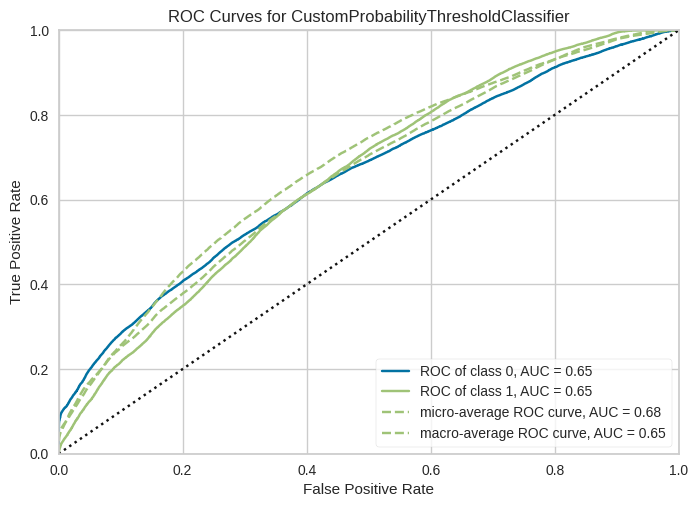

In [17]:
plot_model(regression_model_lr, plot = 'auc')

In [18]:
regression_model_rf = classification_setup.create_model("rf", probability_threshold = 0.50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9993,1.0000,0.9988,1.0000,0.9994,0.9987,0.9987
1,0.9992,1.0000,0.9988,0.9998,0.9993,0.9984,0.9984
2,0.9993,1.0000,0.9990,0.9997,0.9994,0.9986,0.9986
3,0.9992,1.0000,0.9989,0.9996,0.9993,0.9984,0.9984
4,0.9993,1.0000,0.9990,0.9998,0.9994,0.9987,0.9987
5,0.9993,1.0000,0.9989,0.9999,0.9994,0.9987,0.9987
6,0.9991,1.0000,0.9987,0.9997,0.9992,0.9982,0.9982
7,0.9987,0.9999,0.9980,0.9997,0.9988,0.9974,0.9974
8,0.9991,1.0000,0.9984,1.0000,0.9992,0.9982,0.9982


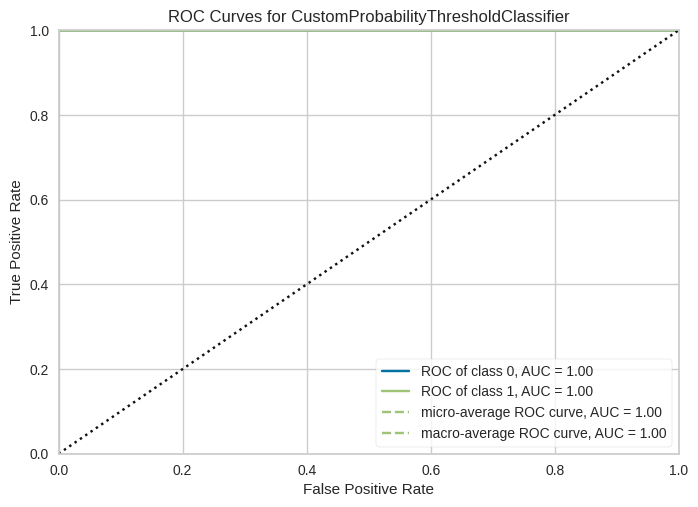

In [19]:
plot_model(regression_model_rf, plot = 'auc')

In [20]:
regression_model_gbc = classification_setup.create_model("gbc", probability_threshold = 0.50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6895,0.7853,0.8756,0.6724,0.7607,0.3397,0.3644
1,0.6893,0.7770,0.8706,0.6736,0.7595,0.3402,0.3632
2,0.6850,0.7761,0.8650,0.6711,0.7558,0.3316,0.3533
3,0.6837,0.7789,0.8718,0.6681,0.7565,0.3270,0.3513
4,0.6882,0.7743,0.8646,0.6742,0.7577,0.3390,0.3601
5,0.6845,0.7732,0.8668,0.6702,0.7559,0.3300,0.3524
6,0.6881,0.7805,0.8699,0.6727,0.7587,0.3376,0.3605
7,0.6770,0.7687,0.8577,0.6657,0.7496,0.3145,0.3350
8,0.6868,0.7740,0.8676,0.6721,0.7575,0.3352,0.3575


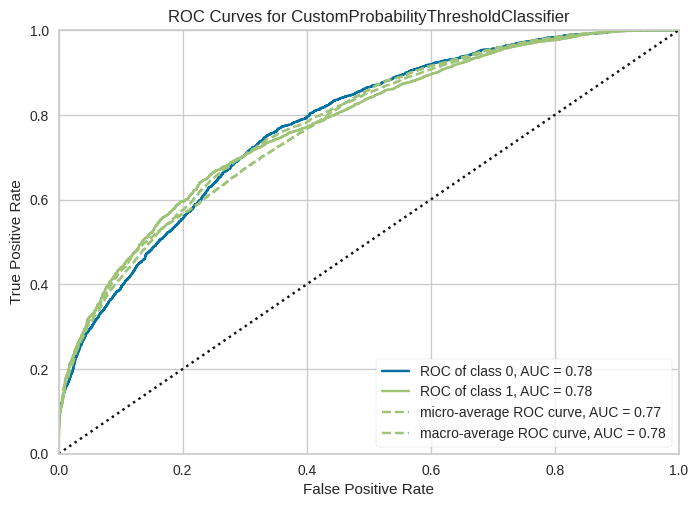

In [21]:
plot_model(regression_model_gbc, plot = 'auc')

In [22]:
regression_model_lightgbm = classification_setup.create_model("lightgbm", probability_threshold = 0.50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8916,0.9657,0.9482,0.8710,0.9079,0.7768,0.7809
1,0.8963,0.9667,0.9509,0.8757,0.9118,0.7865,0.7904
2,0.8806,0.9592,0.9411,0.8602,0.8988,0.7539,0.7585
3,0.8913,0.9668,0.9483,0.8704,0.9077,0.7761,0.7804
4,0.8935,0.9665,0.9456,0.8755,0.9092,0.7810,0.7844
5,0.8832,0.9623,0.9351,0.8679,0.9002,0.7598,0.7629
6,0.8901,0.9650,0.9426,0.8726,0.9062,0.7739,0.7772
7,0.8826,0.9613,0.9413,0.8629,0.9004,0.7582,0.7624
8,0.8917,0.9666,0.9458,0.8727,0.9078,0.7772,0.7809


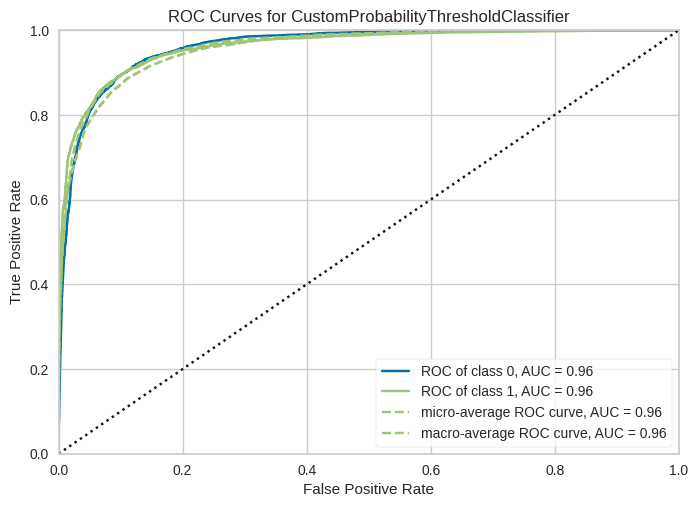

In [23]:
plot_model(regression_model_lightgbm, plot = 'auc')

In [24]:
regression_model_ada = classification_setup.create_model("ada", probability_threshold = 0.50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6506,0.7016,0.8518,0.6435,0.7332,0.2545,0.2762
1,0.6488,0.6959,0.8559,0.6412,0.7331,0.2494,0.2726
2,0.6473,0.6950,0.8454,0.6421,0.7299,0.2483,0.2685
3,0.6496,0.6983,0.8501,0.6431,0.7322,0.2525,0.2738
4,0.6473,0.6961,0.8519,0.6407,0.7314,0.2468,0.2688
5,0.6463,0.6877,0.8309,0.6445,0.7259,0.2493,0.2657
6,0.6461,0.6964,0.8455,0.6411,0.7292,0.2454,0.2657
7,0.6424,0.6879,0.8518,0.6366,0.7287,0.2353,0.2577
8,0.6452,0.6903,0.8373,0.6420,0.7268,0.2451,0.2633


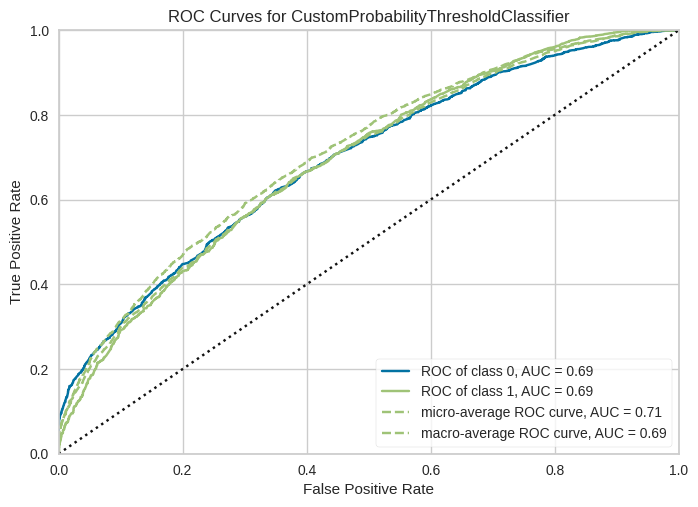

In [25]:
plot_model(regression_model_ada, plot = 'auc')

**evaluate model**

`lightgbm` shows very good AUC of `0.97`, `rf` as well with `1.0` train AUC.

`rf` seemed like too overfit with 1.0 train AUC but its test precision as well is the best among others.

`ada` shows very low recall thus inpractical.


In [26]:
def predict_and_odds(df_data, regression_model):
    df_prediction = pycaret.classification.predict_model(data = df_data, estimator = regression_model)
    df_prediction = pd.merge(df_prediction, df_player_team_positions[['player_id','player_team_name']], left_on='batting_id', right_on='player_id', how='left')
    df_prediction["theo_odds"] = df_prediction["prediction_score"].apply(model.common.odds_calculator)
    return df_prediction

In [70]:
def get_eval_profile(df_prediction, score_threshold):
    confident_prediction = df_prediction.drop_duplicates("batting_name")
    confident_prediction = confident_prediction[confident_prediction["prediction_score"] >= score_threshold]
    # for some reason, the prediction_label should be separatedly checked. higher score does not always lead to prediction label. (maybe the score stands for both labels).
    confident_prediction = confident_prediction[confident_prediction["prediction_label"] == 1]
    l = len(confident_prediction)
    return l, confident_prediction.batting_hit_recorded.sum() / l

In [71]:
df_prediction=train_prediction_lr
score_threshold=0.70
df_prediction[(df_prediction["prediction_score"] >= score_threshold)][['prediction_score', 'prediction_label']]

,prediction_score,prediction_label
7,0.9086,0
8,0.9086,0
9,0.9086,0
18,0.8536,0
19,0.8536,0
...,...,...
990315,0.7063,1
990318,0.7005,1
990319,0.7005,1
990320,0.7005,1


In [28]:
regression_model = regression_model_rf

In [72]:
train_prediction_lr = predict_and_odds(train_data, regression_model_lr)
train_prediction_gbc = predict_and_odds(train_data, regression_model_gbc)
train_prediction_lightgbm = predict_and_odds(train_data, regression_model_lightgbm)
train_prediction_rf = predict_and_odds(train_data, regression_model_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6303,0.6561,0.8105,0.6348,0.7119,0.2169,0.2298


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6883,0.7798,0.8714,0.6725,0.7591,0.3377,0.3612


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8891,0.9640,0.9521,0.8648,0.9063,0.7711,0.7765


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9998,1.0000,0.9997,1.0000,0.9998,0.9996,0.9996


In [73]:
print(get_eval_profile(train_prediction_lr, 0.6))
print(get_eval_profile(train_prediction_lr, 0.7))
print(get_eval_profile(train_prediction_lr, 0.75))
print(get_eval_profile(train_prediction_lr, 0.80))

(342, 0.6549707602339181)
(120, 0.7)
(49, 0.7755102040816326)
(7, 1.0)


In [74]:
print(get_eval_profile(train_prediction_gbc, 0.6))
print(get_eval_profile(train_prediction_gbc, 0.7))
print(get_eval_profile(train_prediction_gbc, 0.75))
print(get_eval_profile(train_prediction_gbc, 0.80))

(338, 0.757396449704142)
(118, 0.9067796610169492)
(66, 0.9696969696969697)
(28, 1.0)


In [75]:
print(get_eval_profile(train_prediction_lightgbm, 0.6))
print(get_eval_profile(train_prediction_lightgbm, 0.7))
print(get_eval_profile(train_prediction_lightgbm, 0.75))
print(get_eval_profile(train_prediction_lightgbm, 0.80))

(411, 0.927007299270073)
(251, 0.9721115537848606)
(196, 0.9846938775510204)
(125, 1.0)


In [76]:
print(get_eval_profile(train_prediction_rf, 0.6))
print(get_eval_profile(train_prediction_rf, 0.7))
print(get_eval_profile(train_prediction_rf, 0.75))
print(get_eval_profile(train_prediction_rf, 0.80))

(669, 0.9985052316890882)
(653, 0.998468606431853)
(640, 1.0)
(620, 1.0)


**test prediction**

In [77]:
test_prediction_lr = predict_and_odds(test_data, regression_model_lr)
test_prediction_gbc = predict_and_odds(test_data, regression_model_gbc)
test_prediction_lightgbm = predict_and_odds(test_data, regression_model_lightgbm)
test_prediction_rf = predict_and_odds(test_data, regression_model_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5926,0.6166,0.7666,0.6232,0.6875,0.1198,0.1252


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6034,0.6304,0.8070,0.6245,0.7041,0.1317,0.1420


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6024,0.6127,0.7437,0.6370,0.6863,0.1524,0.1559


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6107,0.6346,0.7619,0.6405,0.6959,0.1662,0.1711


In [78]:
print(get_eval_profile(test_prediction_lr, 0.6))
print(get_eval_profile(test_prediction_lr, 0.7))
print(get_eval_profile(test_prediction_lr, 0.75))
print(get_eval_profile(test_prediction_lr, 0.80))
print(get_eval_profile(test_prediction_lr, 0.85))

(159, 0.7044025157232704)
(51, 0.7647058823529411)
(20, 0.9)
(6, 1.0)
(2, 1.0)


In [79]:
print(get_eval_profile(test_prediction_gbc, 0.6))
print(get_eval_profile(test_prediction_gbc, 0.7))
print(get_eval_profile(test_prediction_gbc, 0.75))
print(get_eval_profile(test_prediction_gbc, 0.80))
print(get_eval_profile(test_prediction_gbc, 0.85))

(163, 0.7116564417177914)
(45, 0.7111111111111111)
(18, 0.8333333333333334)
(12, 0.9166666666666666)
(4, 0.75)


In [80]:
print(get_eval_profile(test_prediction_lightgbm, 0.6))
print(get_eval_profile(test_prediction_lightgbm, 0.7))
print(get_eval_profile(test_prediction_lightgbm, 0.75))
print(get_eval_profile(test_prediction_lightgbm, 0.80))
print(get_eval_profile(test_prediction_lightgbm, 0.85))

(164, 0.676829268292683)
(76, 0.6842105263157895)
(50, 0.7)
(29, 0.8275862068965517)
(10, 0.9)


In [81]:
print(get_eval_profile(test_prediction_rf, 0.6))
print(get_eval_profile(test_prediction_rf, 0.7))
print(get_eval_profile(test_prediction_rf, 0.75))
print(get_eval_profile(test_prediction_rf, 0.80))
print(get_eval_profile(test_prediction_rf, 0.85))

(164, 0.6829268292682927)
(67, 0.7164179104477612)
(32, 0.875)
(12, 1.0)
(6, 1.0)


**Finalize Model**

In [82]:
# train over the whole dataset without validation split
regression_model_finalized_lr = pycaret.classification.finalize_model(regression_model_lr)
regression_model_finalized_gbc = pycaret.classification.finalize_model(regression_model_gbc)
regression_model_finalized_lightgbm = pycaret.classification.finalize_model(regression_model_lightgbm)
regression_model_finalized_rf = pycaret.classification.finalize_model(regression_model_rf)

In [83]:
test_finalized_prediction_lr = predict_and_odds(test_data, regression_model_finalized_lr)
test_finalized_prediction_gbc = predict_and_odds(test_data, regression_model_finalized_gbc)
test_finalized_prediction_lightgbm = predict_and_odds(test_data, regression_model_finalized_lightgbm)
test_finalized_prediction_rf = predict_and_odds(test_data, regression_model_finalized_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5920,0.6180,0.7554,0.6250,0.6840,0.1227,0.1271


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.6075,0.6311,0.7970,0.6299,0.7037,0.1457,0.1548


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5787,0.6080,0.7188,0.6206,0.6661,0.1036,0.1057


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6193,0.6356,0.7739,0.6454,0.7039,0.1829,0.1889


In [84]:
print(get_eval_profile(test_finalized_prediction_lr, 0.6))
print(get_eval_profile(test_finalized_prediction_lr, 0.7))
print(get_eval_profile(test_finalized_prediction_lr, 0.75))
print(get_eval_profile(test_finalized_prediction_lr, 0.80))
print(get_eval_profile(test_finalized_prediction_lr, 0.85))

(147, 0.6938775510204082)
(47, 0.8085106382978723)
(18, 0.9444444444444444)
(4, 1.0)
(2, 1.0)


In [85]:
print(get_eval_profile(test_finalized_prediction_gbc, 0.6))
print(get_eval_profile(test_finalized_prediction_gbc, 0.7))
print(get_eval_profile(test_finalized_prediction_gbc, 0.75))
print(get_eval_profile(test_finalized_prediction_gbc, 0.80))
print(get_eval_profile(test_finalized_prediction_gbc, 0.85))

(160, 0.725)
(43, 0.7209302325581395)
(22, 0.9090909090909091)
(12, 0.9166666666666666)
(7, 0.8571428571428571)


In [86]:
print(get_eval_profile(test_finalized_prediction_lightgbm, 0.6))
print(get_eval_profile(test_finalized_prediction_lightgbm, 0.7))
print(get_eval_profile(test_finalized_prediction_lightgbm, 0.75))
print(get_eval_profile(test_finalized_prediction_lightgbm, 0.80))
print(get_eval_profile(test_finalized_prediction_lightgbm, 0.85))

(154, 0.6883116883116883)
(72, 0.7638888888888888)
(42, 0.8333333333333334)
(23, 0.8695652173913043)
(10, 1.0)


In [87]:
print(get_eval_profile(test_finalized_prediction_rf, 0.6))
print(get_eval_profile(test_finalized_prediction_rf, 0.7))
print(get_eval_profile(test_finalized_prediction_rf, 0.75))
print(get_eval_profile(test_finalized_prediction_rf, 0.80))
print(get_eval_profile(test_finalized_prediction_rf, 0.85))

(168, 0.6785714285714286)
(70, 0.7)
(29, 0.7931034482758621)
(13, 0.8461538461538461)
(3, 1.0)


**Save Model**

In [191]:
pycaret.classification.save_model(regression_model_finalized_rf, model.common.model_file_name)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['pitching_gamesPlayed',
                                              'pitching_runs_per_game',
                                              'pitching_strikeOuts_per_game',
                                              'pitching_hits_per_game',
                                              'batting_gamesPlayed',
                                              'batting_runs_per_game',
                                              'batting_strikeOuts_per_game',
                                              'batting_hits_per_game',
                                              'batting_rbi',
                                              'pitching_cur_...
                                                                                         random_state=1065,
                                              